In [3]:
%pylab --no-import-all inline
import sklearn.datasets
import cv2
import itertools

from utils import *

Populating the interactive namespace from numpy and matplotlib


In [4]:
import read_mnist
mnist = read_mnist.read_data_sets('MNIST/')

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [5]:
X = np.array(np.concatenate([mnist.train.images, mnist.test.images]), np.uint8)
Y = np.array(np.concatenate([mnist.train.labels, mnist.test.labels]), np.uint8)

In [6]:
STEPS = [np.array([0, 1]), np.array([0, -1]), np.array([1, 0]), np.array([-1, 0])]

def random_walker(start=(0, 0), multiplier=1):
    point = np.array(start)
    while True:
        yield point
        point = point + STEPS[np.random.choice(range(4))] * multiplier

def put_a_blob(img, start=(17, 17), center_step=5, centers_count=5, points_count=6):
    side_size = int(img.size ** 0.5)
    assert side_size ** 2 == img.size
    square_img = img.reshape((side_size, side_size))
    
    for center in itertools.islice(random_walker(start, center_step), centers_count):
        for j, point in enumerate(itertools.islice(random_walker(center), points_count)):
            color = int(255.0 * (5*points_count - j) / (5*points_count))
            cv2.rectangle(square_img, tuple(point), tuple(point + (1, 1)), color, cv2.cv.CV_FILLED)
            
def put_a_blob_B(img, start=(17, 17), center_step=2, shift_count=8, threds_count=3):
    for j in xrange(threds_count):
        center_iter = random_walker(start, center_step)
        for _ in xrange(shift_count):
            thred_start = next(center_iter)
        put_a_blob(img, thred_start, 2, 3, 20)
    return img


In [28]:
for j in xrange(Y.size):
    if j % 1000 == 0:
        print j
    put_a_blob_B(X[j])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000


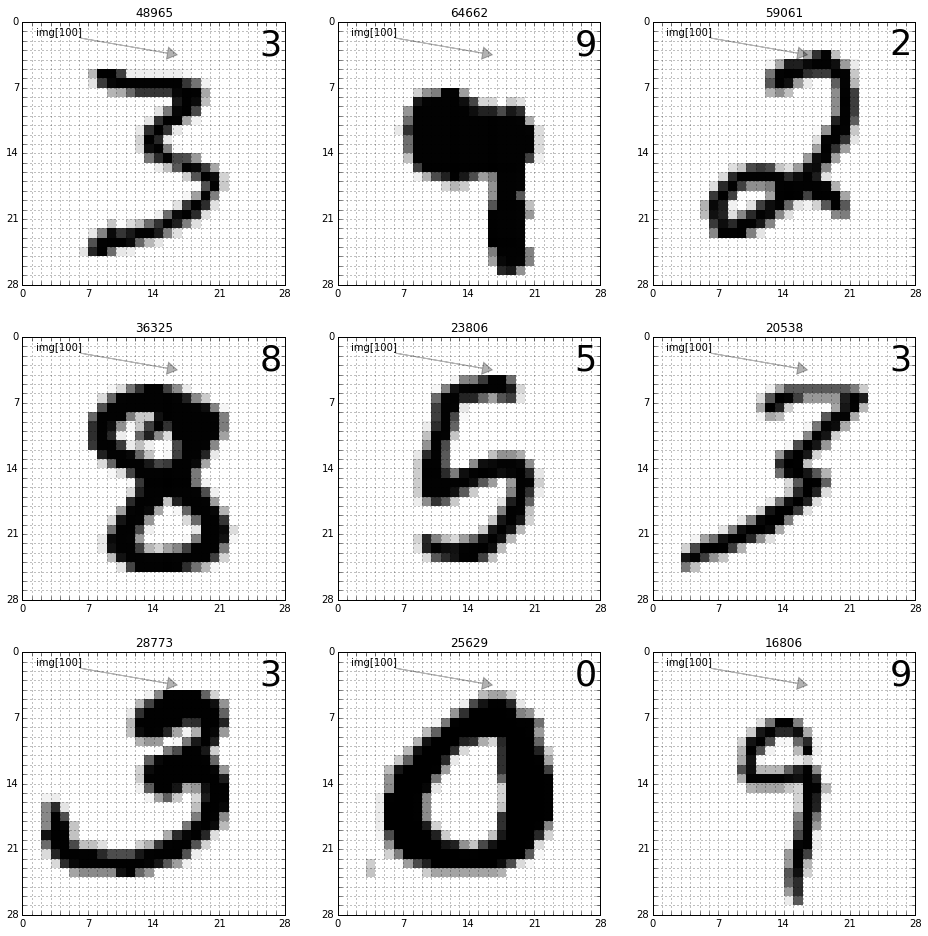

In [7]:
N = 3
plt.figure(figsize=(16, 16))
for j in range(1, N**2+1):
    index = np.random.randint(Y.size)
    plt.subplot(N, N, j)
    imgshow(X[index], Y[index])
    plt.title(str(index))

In [8]:
np.save('datasets/mnist_original.npy', X)